In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

df = pd.read_csv("Fraud_check.csv")

In [2]:
#Viewing top 5 rows of dataframe
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [4]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [5]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [6]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10          False   
1             33700           134075               18           True   
2             36925           160205               30          False   
3             50190           193264               15           True   
4             81002            27533               28          False   
..              ...              ...              ...            ...   
595           76340            39492                7           True   
596           69967            55369                2           True   
597           47334           154058                0          False   
598           98592           180083               17           True   
599           96519           158137               16          False   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                     False                   True       True   

# Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [7]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [8]:
#Viewing buttom 10 observations
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,False,True,False,True,True
591,27394,132859,18,True,False,True,True,False
592,68152,75143,16,True,False,True,False,True
593,84775,131963,10,False,False,False,True,True
594,47364,97526,9,False,True,False,True,True
595,76340,39492,7,True,False,False,True,True
596,69967,55369,2,True,False,False,True,True
597,47334,154058,0,False,False,False,True,True
598,98592,180083,17,True,True,False,False,True
599,96519,158137,16,False,False,False,False,True


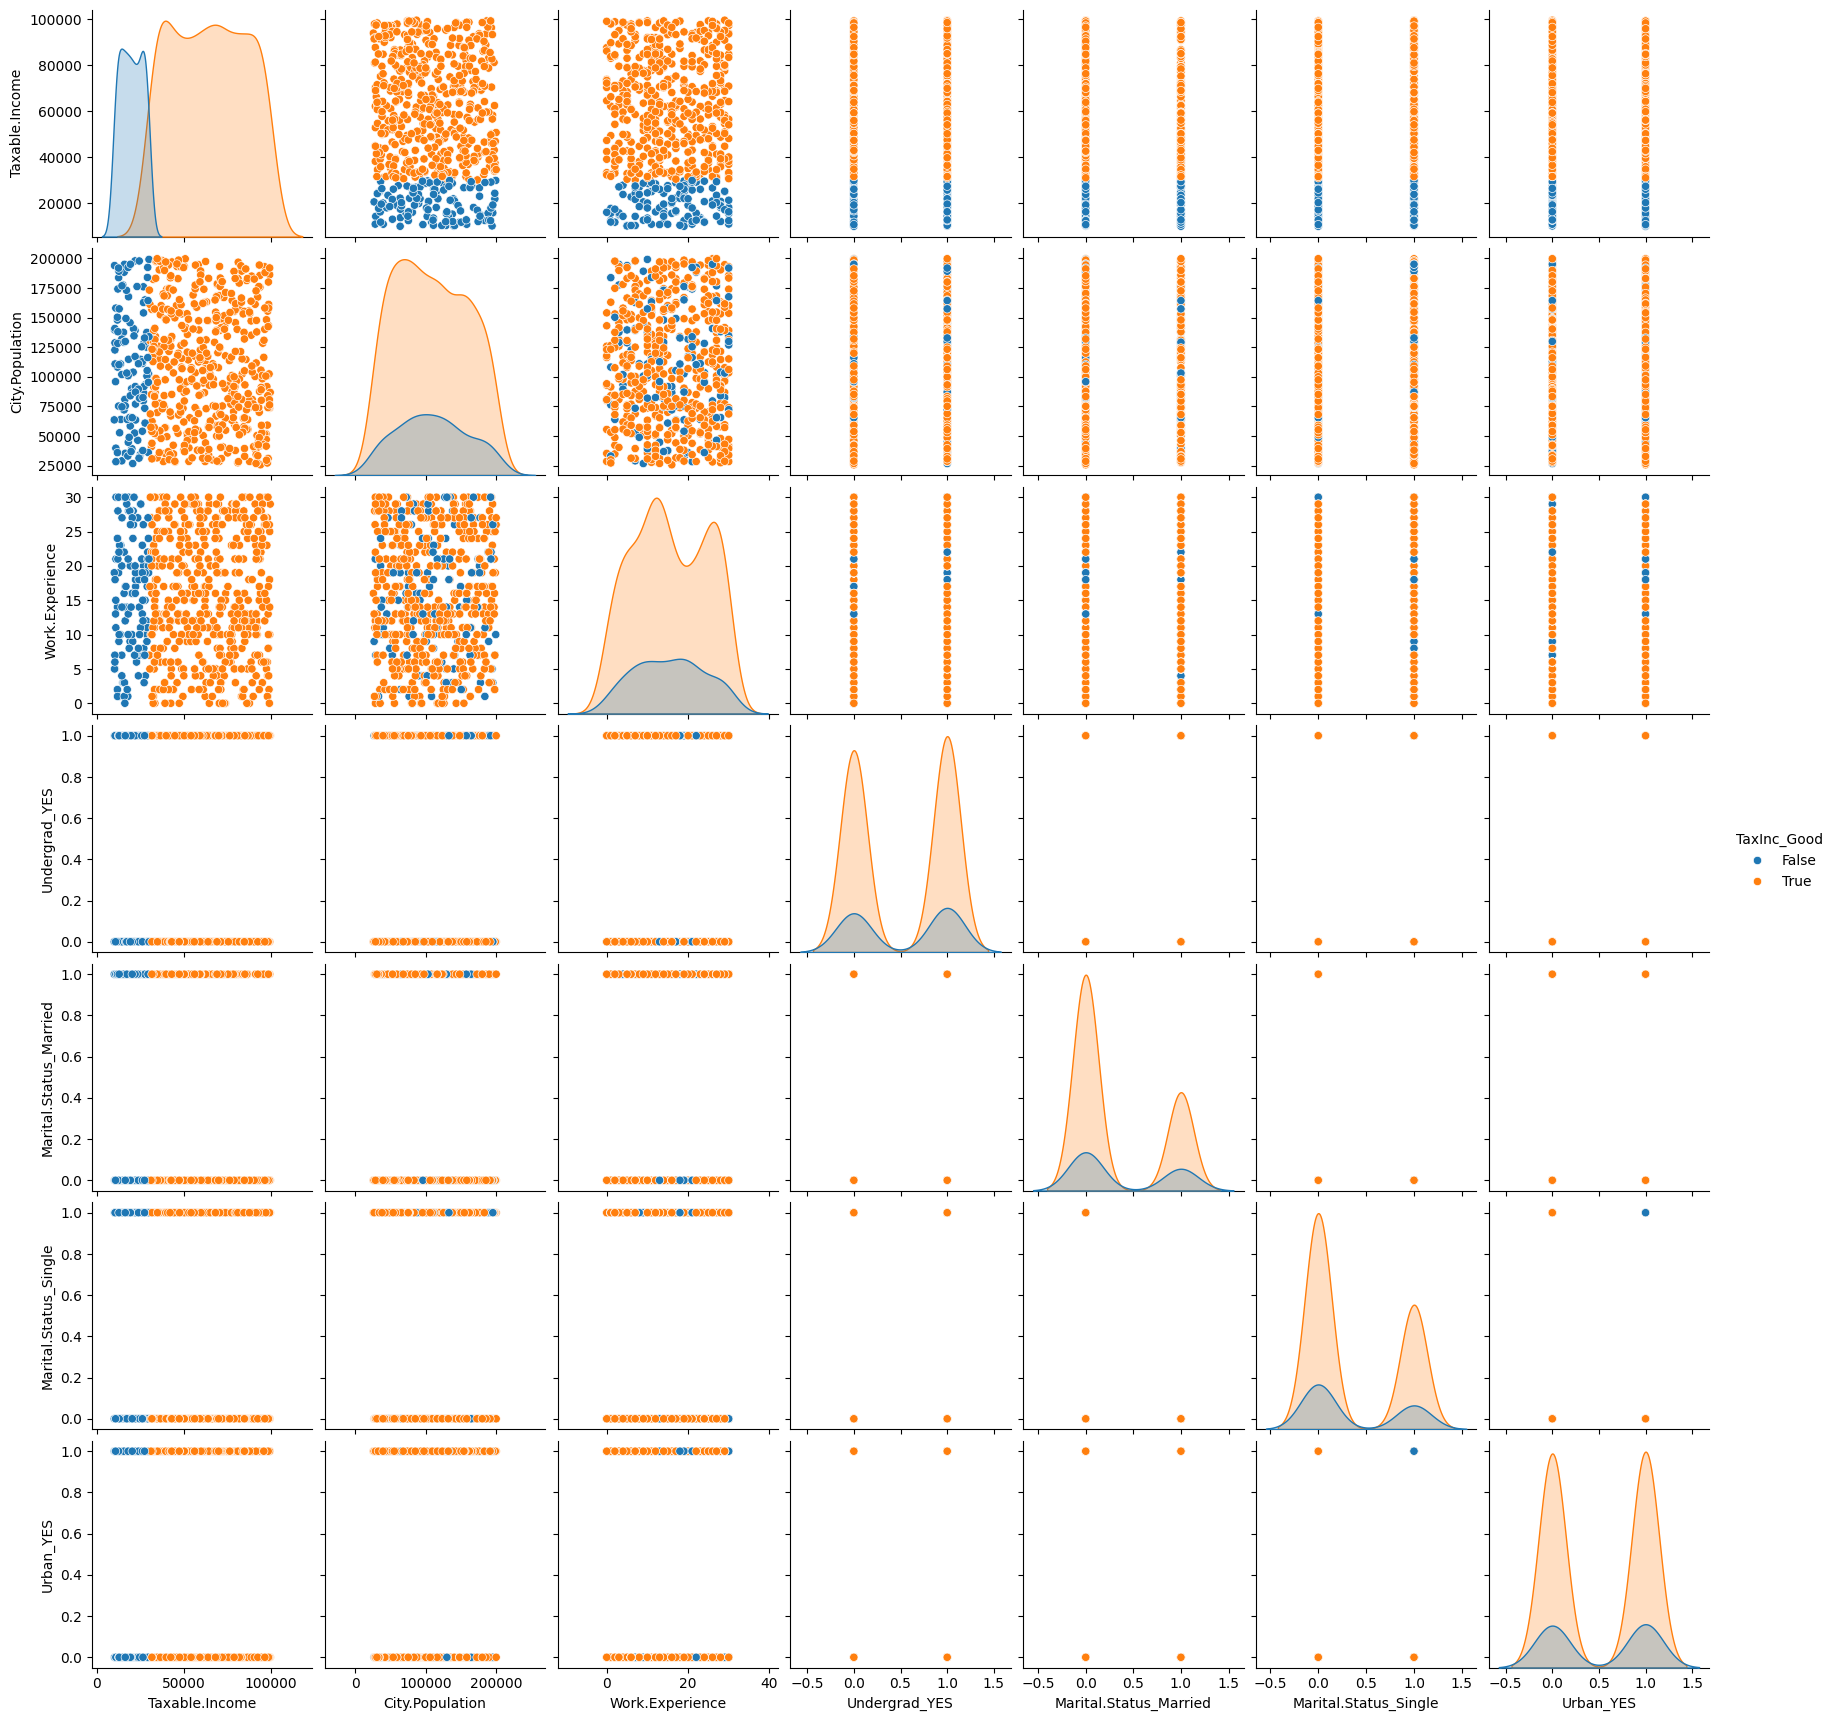

In [9]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [10]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
# Normalized data frame (considering the numerical part of data)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,False,False,True,True,True
1,33700,134075,18,True,False,False,True,True
2,36925,160205,30,False,True,False,True,True
3,50190,193264,15,True,False,True,True,True
4,81002,27533,28,False,True,False,False,True
...,...,...,...,...,...,...,...,...
595,76340,39492,7,True,False,False,True,True
596,69967,55369,2,True,False,False,True,True
597,47334,154058,0,False,False,False,True,True
598,98592,180083,17,True,True,False,False,True


In [15]:
# Declaring features & target
X = df.drop(['TaxInc_Good'], axis=1)
y = df['TaxInc_Good']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
##Converting the Taxable income variable to bucketing. 
df["income"]="<=30000"
df.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [19]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [20]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [21]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [22]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [23]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [25]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [27]:
model.estimators_
model.classes_
model.n_classes_

2

In [28]:
model.n_outputs_

1

In [29]:
model.oob_score_
###74.7833%

0.48333333333333334

In [30]:
##Predictions on train data
prediction = model.predict(x_train)

In [31]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
##98.33%

In [32]:
np.mean(prediction == y_train)
##98.33%

0.9854166666666667

In [33]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [34]:
##Prediction on test data
pred_test = model.predict(x_test)

In [35]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

In [37]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
from six import StringIO

In [38]:
tree = model.estimators_[5]

In [41]:
dot_data = StringIO()

In [44]:
graph = dot_data.getvalue()

# Building Decision Tree Classifier using Entropy Criteria

In [45]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
from sklearn import tree

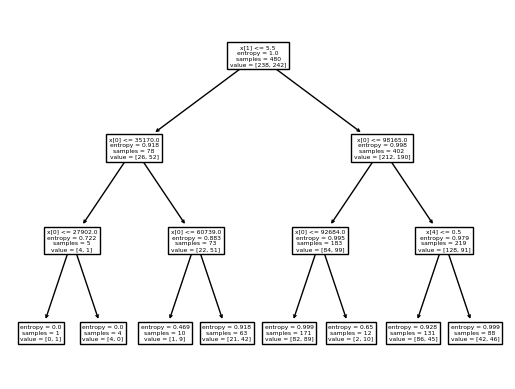

In [47]:
#PLot the decision tree
tree.plot_tree(model);

In [48]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good',
 'income']

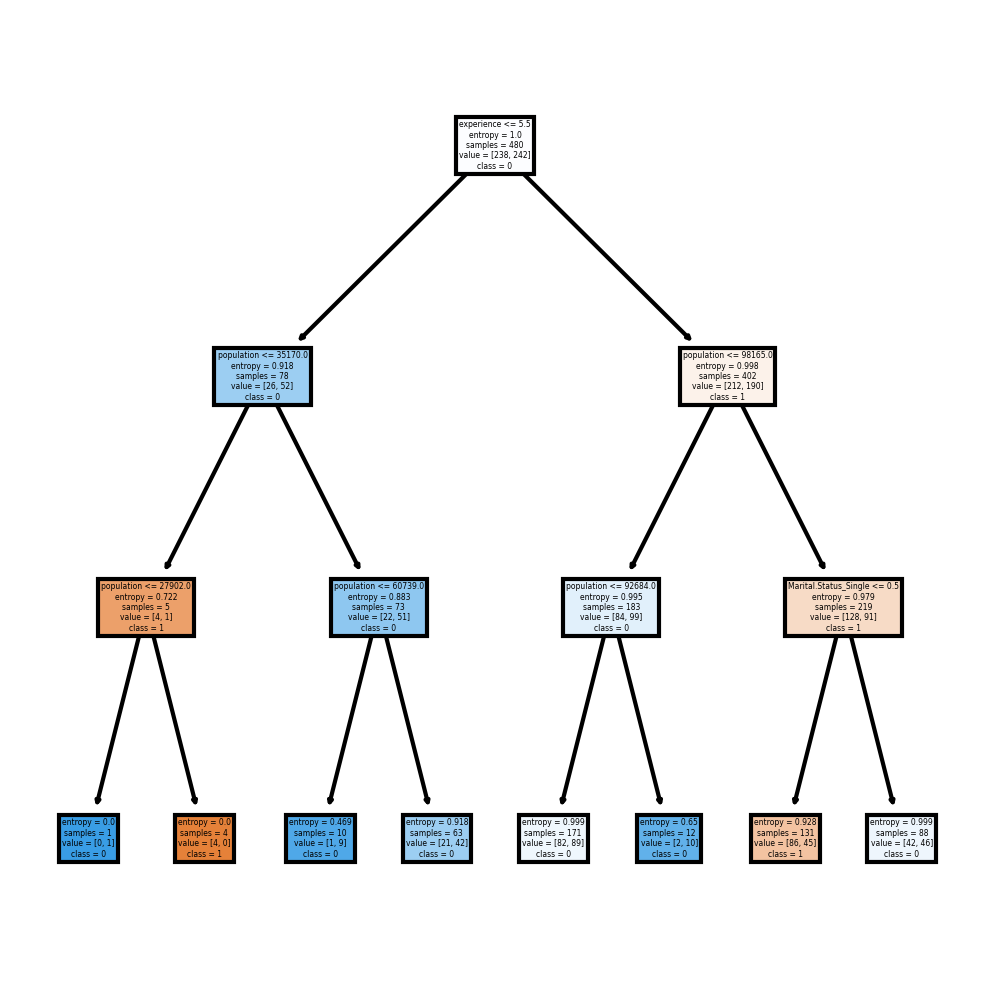

In [49]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [50]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

True     77
False    43
Name: count, dtype: int64

In [51]:
preds

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True])

In [52]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,False,True
Urban_YES,,
False,22,38
True,21,39


In [53]:
# Accuracy 
np.mean(preds==y_test)

0.5083333333333333

# Building Decision Tree Classifier (CART) using Gini Criteria

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [55]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [56]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5083333333333333

# Decision Tree Regression Example

In [57]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [58]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [60]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
#Find the accuracy
model.score(X_test,y_test)

-0.9393656716417913

# THE END